In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_set = pd.read_csv("C:/Sefkan//heart_failure.csv")

In [2]:
x = data_set.iloc[:,[2,3]].values
y = data_set.iloc[:,4].values

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sp_x = StandardScaler()
x_train = sp_x.fit_transform(x_train)
x_test = sp_x.transform(x_test)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

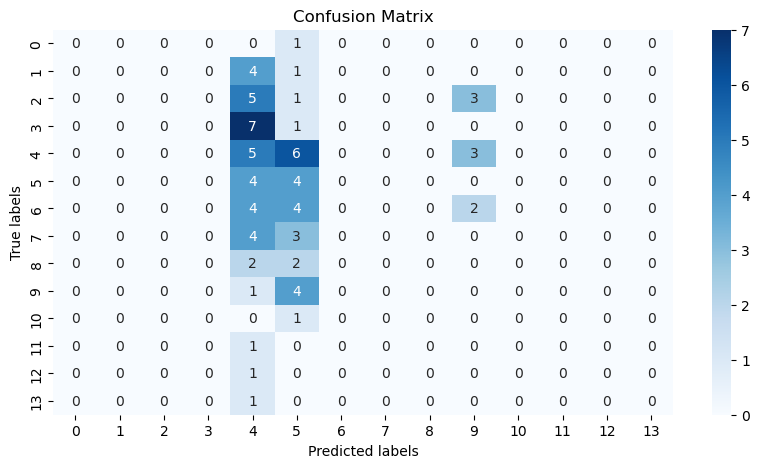

In [4]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

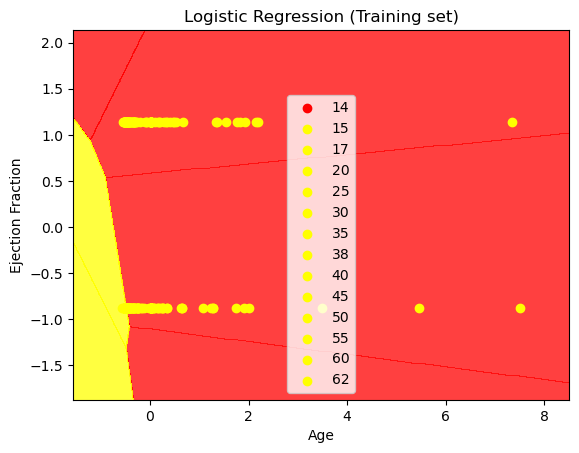

In [5]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, logreg.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(("red","yellow" )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        color = ListedColormap(("red", "yellow"))(i), label = j)  
plt.title("Logistic Regression (Training set)")  
plt.xlabel("Age")  
plt.ylabel("Ejection Fraction")  
plt.legend()  
plt.show()  

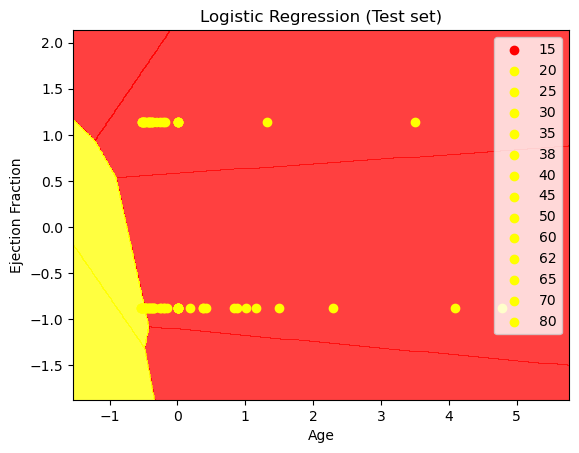

In [6]:
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, logreg.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(("red","yellow" )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        color = ListedColormap(("red", "yellow"))(i), label = j)  
plt.title("Logistic Regression (Test set)")  
plt.xlabel("Age")  
plt.ylabel("Ejection Fraction")  
plt.legend()  
plt.show()  